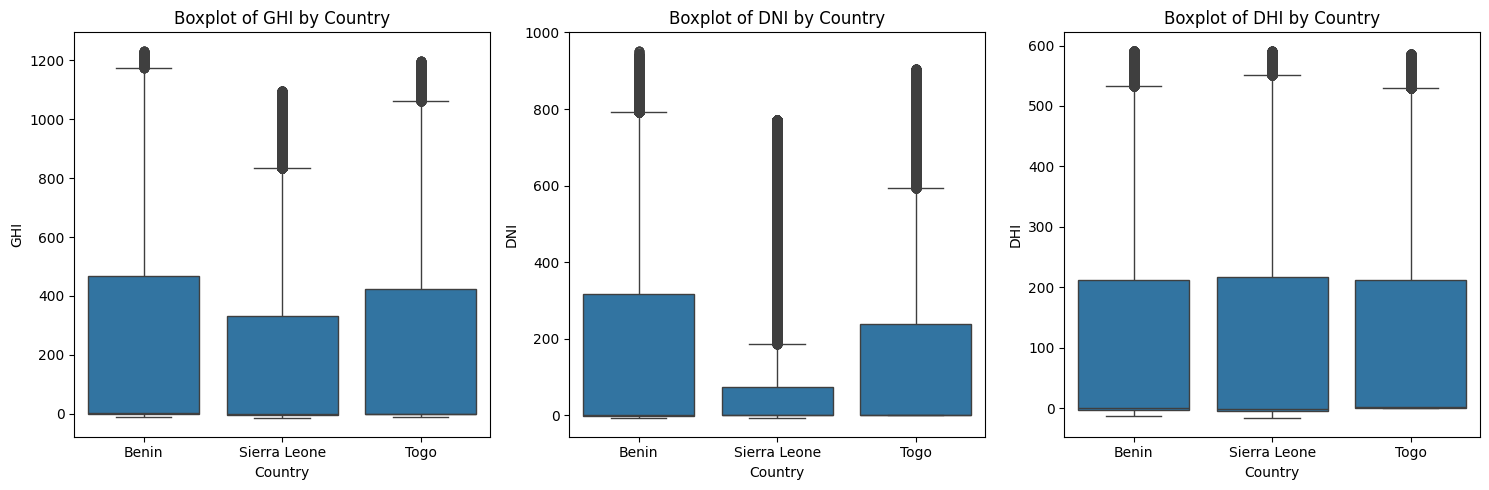

                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744  
ANOVA test on GHI across countries: F = 3833.184, p = 0.00000


C:\Users\Bob\AppData\Local\Temp\ipykernel_6760\1906579156.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ghi_means.index, y=ghi_means.values, palette='viridis')


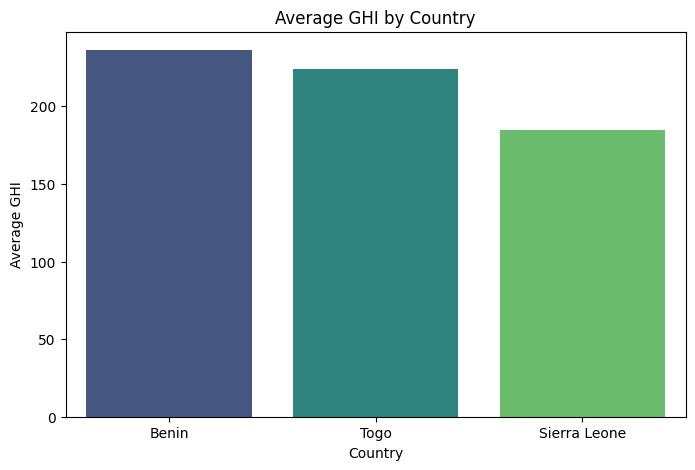

In [1]:
# Import necessary libraries for data handling, visualization, and statistics
import pandas as pd                 # For data manipulation
import matplotlib.pyplot as plt     # For plotting graphs
import seaborn as sns               # For prettier statistical plots
from scipy import stats             # For performing statistical tests

# Load cleaned CSV files for each country into separate DataFrames
benin = pd.read_csv('../data/benin_clean.csv')             # Benin dataset
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv') # Sierra Leone dataset
togo = pd.read_csv('../data/togo_clean.csv')               # Togo dataset

# Add a 'Country' column to each DataFrame for easy identification after merging
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all three datasets vertically into a single DataFrame
# ignore_index=True resets the row index in the combined DataFrame
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

# List of solar irradiance metrics we want to compare across countries
metrics = ['GHI', 'DNI', 'DHI']

# Set the figure size to fit three plots side-by-side
plt.figure(figsize=(15, 5))

# Loop through each metric to create a separate boxplot
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)                  # Create a subplot in a 1x3 grid
    # Boxplot shows distribution of metric values by country
    sns.boxplot(x='Country', y=metric, data=df)
    plt.title(f'Boxplot of {metric} by Country')  # Title for each subplot

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()          # Display the plots

# Generate a summary table with mean, median, and standard deviation grouped by country
summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
print(summary)  # Print the summary stats to console/output

# Prepare the GHI values from each country for statistical testing
benin_ghi = benin['GHI'].dropna()                # Drop missing values for clean test
sl_ghi = sierra_leone['GHI'].dropna()
togo_ghi = togo['GHI'].dropna()

# Perform one-way ANOVA test to see if mean GHI differs significantly between countries
f_stat, p_val = stats.f_oneway(benin_ghi, sl_ghi, togo_ghi)
print(f"ANOVA test on GHI across countries: F = {f_stat:.3f}, p = {p_val:.5f}")

# --- The below block would be a markdown cell in the notebook ---
"""
Key Observations:
- Benin shows the highest median GHI but also exhibits notable variability.
- Sierra Leone has the lowest average DNI, indicating less direct solar irradiance.
- Togo's DHI values are more consistent compared to other countries.
"""

# Bonus: Create a bar chart ranking countries by their average GHI values

# Calculate the mean GHI for each country and sort descending
ghi_means = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))  # Set figure size for the bar chart
# Create a bar plot with country names on x-axis and mean GHI on y-axis
sns.barplot(x=ghi_means.index, y=ghi_means.values, palette='viridis')
plt.title('Average GHI by Country')  # Title of the chart
plt.ylabel('Average GHI')             # Label y-axis
plt.xlabel('Country')                 # Label x-axis
plt.show()                           # Display the bar chart
